<a href="https://colab.research.google.com/github/FabioCarlesso/ds-study-codes/blob/main/Codes/pos/AnalisarTextos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tarefa: Analisar textos.

Os textos baixados podem estar relacionados com um interesse da equipe, mas devem ser baixadas, no mínimo, 50.000 (cinquenta mil sentenças).

Para a análise, deve-se produzir:

* Contagem de sentenças
* Vocabulário
* Frequência de palavras relevantes (com gráfico de colunas ou barras)
* Trigramas relevantes (com gráfico de colunas ou barras) 
* Quais locais (entidades da classe LOCAL) são citados no texto processado?
* Quantas vezes cada local é  citado?
* Qual é a proporção de pronomes frente aos verbos do texto?
* Nuvem de palavras
* Obtenha um resumo dos textos utilizados, acompanhados das palavras-chave

In [ ]:
!pip install PyPDF2
!pip install gensim
!pip install wikipedia
!pip install matplotlib
!pip install wordcloud
!python -m spacy download pt_core_news_sm

✔ Download and installation successful
You can now load the model via spacy.load('pt_core_news_sm')


In [ ]:
import pkg_resources, imp
imp.reload(pkg_resources)
import spacy
import gensim, wikipedia
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS
import wikipedia
from gensim.summarization.summarizer import summarize
from gensim.summarization.keywords import keywords
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')
nltk.download('words')
nltk.download('maxent_ne_chunker')
nltk.download('machado')
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import machado
from nltk import ngrams
from nltk.corpus import stopwords
from nltk import tokenize
from PyPDF2 import PdfFileReader
from nltk import sent_tokenize
from collections import Counter

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package machado to /root/nltk_data...
[nltk_data]   Package machado is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
count = 1
obras_pdf = []
for count in range(1,2):
  arquivo = '/content/livro'+str(count)+'.pdf'
  pdf_arquivo = open(arquivo,'rb')
  obras_pdf.append(PdfFileReader(pdf_arquivo))

texto_completo = []
for read_pdf in obras_pdf:
  for i in range(0, read_pdf.getNumPages()):
    texto_completo.append(read_pdf.getPage(i).extractText())

palavras_s = sent_tokenize(' '.join(texto_completo))
sentencas = []
for s in palavras_s:
  sentencas.append(s)

In [ ]:
# Contagem de sentenças
print('Total de sentenças: ', len(sentencas))

Total de sentenças:  13284


[('disse', 1384), ('frodo', 1139), ('sobre', 588), ('agora', 536), ('gandalf', 457), ('ainda', 427), ('sam', 407), ('tempo', 402), ('ser', 401), ('então', 401), ('bem', 396), ('anel', 390), ('hobbits', 365), ('aqui', 341), ('grande', 327)]
  disse   frodo   sobre   agora gandalf   ainda     sam   tempo     ser   então     bem    anel hobbits    aqui  grande 
   1384    1139     588     536     457     427     407     402     401     401     396     390     365     341     327 


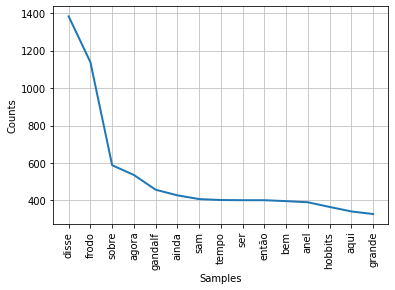

In [ ]:
# Vocabulário
# Frequência de palavras relevantes (com gráfico de colunas ou barras)

stopwords_pt = stopwords.words('portuguese')
minha_stop_w = [',', ':', '.', '\'', '/', '-', '..', '', '', '!', '[', '(', ')', ']', '?', ':', '%', '&', '*', '#', '...', '\x97', '\x93', '\x94', '\x94.', '?\x94', ';', '.....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................', '--', '``', '˙', 'ˆ', '>', '˜', '+', '˘', '˛', '˜ˆ']

completo_str = ' '.join(texto_completo)
tokens = tokenize.word_tokenize(completo_str.lower())
texto_limpo = []
for p in tokens:
  if (p not in stopwords_pt) and (p not in minha_stop_w):
    texto_limpo.append(p)
fdistLimpo = nltk.FreqDist(texto_limpo)
#definimos os 15 primeiros, mas pode deixar todos se sua maquina aguentar
print(fdistLimpo.most_common(15))
fdistLimpo.tabulate(15)
fdistLimpo.plot(15)

[(('vale', 'riacho', 'escuro'), 9), (('j.', 'r.', 'r.'), 8), (('alguma', 'outra', 'coisa'), 8), (('sam', 'disse', 'frodo'), 8), (('passo', 'chifre', 'vermelho'), 8), (('r.', 'r.', 'tolkien'), 7), (('sim', 'disse', 'frodo'), 7), (('disse', 'sr.', 'carrapicho'), 7), (('disse', 'voz', 'baixa'), 7), (('aragorn', 'filho', 'arathorn'), 7), (('gimli', 'filho', 'glóin'), 7), (('the', 'lord', 'of'), 6), (('qualquer', 'outra', 'coisa'), 6), (('fazer', 'alguma', 'coisa'), 6), (('senhor', 'disse', 'sam'), 6)]


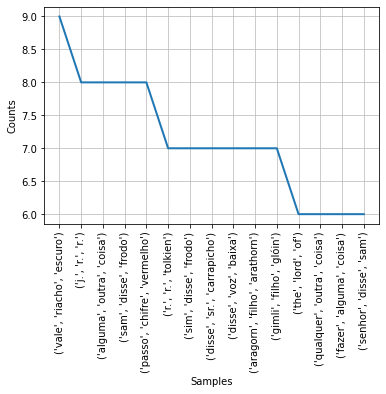

In [ ]:
# Trigramas relevantes (com gráfico de colunas ou barras)
trigramas_filtrado =[]
for ng in ngrams(texto_limpo,3):
  trigramas_filtrado.append(ng)

fdist_trigramas = nltk.FreqDist(trigramas_filtrado)
print(fdist_trigramas.most_common(15))
fdist_trigramas.plot(15)

In [ ]:
# Quais locais (entidades da classe LOCAL) são citados no texto processado?
nlp = spacy.load('pt_core_news_sm')

# IMPORTANTE: a execução estava sendo bloqueada por conta do núemro máximo de chars para executar todo o código é necessário botar o max_length em 35000000
nlp.max_length = 3500000 

texto_corrido = ' '.join(texto_limpo)
doc = nlp(texto_corrido)

locais = []
for ent in doc.ents:
  if ent.label_ == 'LOC':
    locais.append(ent.text)

print(Counter(locais))

Counter({'passolargo': 72, 'lua': 43, 'vale': 14, 'terra': 13, 'alegre': 12, 'bolseiro': 12, 'amanhã': 11, 'orcs': 9, 'minas tirith': 9, 'vila hobbits': 8, 'rohan': 7, 'gramado': 6, 'carrapicho': 6, 'vila bosque': 5, 'rio cinzento': 5, 'lothlórien': 5, 'saiba': 4, 'pacífico': 4, 'caminho verde': 4, 'cristalina': 4, 'monteiro': 4, 'vale riacho escuro': 4, 'rio veloz': 4, 'galadriel': 4, 'rio brandevin': 3, 'brandevin': 3, 'bengala': 3, 'ted': 3, 'ponte brandevin': 3, 'ponta bosque': 3, 'neblina': 3, 'clarão': 3, 'nob': 3, 'tinúviel': 3, 'reino norte': 3, 'glóin': 3, 'minas anor': 3, 'aragorn': 3, 'minas morgul': 3, 'lua nova': 3, 'unicamp': 2, 'valle': 2, 'campinas': 2, 'colheres': 2, 'ousei': 2, 'ceia': 2, 'elfo': 2, 'ladeira verde': 2, 'atravessei': 2, 'ventania': 2, 'palmas': 2, 'grama': 2, 'sombrio': 2, 'cachimbo': 2, 'angband': 2, 'rio': 2, 'banquete': 2, 'reino sul': 2, 'narsil': 2, 'iarwain': 2, 'gandalf': 2, 'gimli': 2, 'minas': 2, 'laje': 2, 'subia': 2, 'celeborn': 2, 'use': 2,

In [ ]:
## Qual é a proporção de pronomes frente aos verbos do texto? 
pos_tag = nltk.pos_tag(texto_corrido)
class_words = Counter(i[1] for i in pos_tag)
pronomes = 0
verbos = 0

for i in class_words.items():
  if i[0].startswith('NN'):
    pronomes += i[1]
  elif i[0].startswith('VB'):
    verbos += i[1]

print("Verbos")
print(verbos)
print("Pronomes")
print(pronomes)

Verbos
84678
Pronomes
478905


In [ ]:
def generate_wordcloud(text):
  wordcloud = WordCloud(width = 800, height = 400,  relative_scaling = 1.0,   stopwords = {'to', 'of', 'us'}).generate(text)
  plt.axis('off')
  plt.imshow(wordcloud)
  plt.savefig('WordCloud.png')
  plt.show()

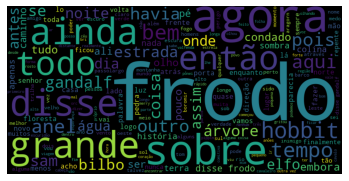

In [ ]:
# Nuvem de palavras
generate_wordcloud(texto_corrido)

In [ ]:
# Obtenha um resumo dos textos utilizados, acompanhados das palavras-chave
key_words = keywords(texto_corrido, ratio=0.05, pos_filter=('NN'), words = 5)
print(key_words)

In [ ]:
summ_per = summarize(texto_corrido, ratio=0.01)
print(summ_per)